<a href="https://colab.research.google.com/github/razvanpsr/aicurs_1/blob/master/Echipa1_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files
uploaded = files.upload()               # am importat bibliotecile si fisierul - de tinut minte importul fisierelor in colab-ul local


Saving Final_data.csv to Final_data.csv


In [ ]:
df = pd.read_csv("Final_data.csv")  # citim fisierul
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,Female,98.31,1.90,199.20,148.18,63.72,0.77,761.61,Strength,...,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,7.924402e+19,Medium
19996,40.38,Female,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,Strength,...,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,5.708474e+19,Low
19997,50.31,Male,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,Strength,...,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,9.101285e+19,High
19998,52.36,Male,44.30,1.62,179.27,121.23,60.88,1.41,929.75,Yoga,...,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,5.246436e+19,Low


In [ ]:
df.Burns_Calories_Bin.unique()

array(['Medium', 'High', 'Low', 'Very High'], dtype=object)

In [ ]:
cols = ['Age', 'Gender', 'Height (m)', 'Weight (kg)', 'Avg_BPM',
        'Calories_Burned', 'BMI', 'Daily meals frequency',
        'Workout_Type', 'Burns_Calories_Bin']                    # am ales 10 coloane pe care sa lucram si sa le modificam.
df = df[cols]                                                    # am salvat DataFrame-ul pe care vom lucra in continuare - df.shape?
print(df.shape)
print(df.head())

(20000, 10)
     Age  Gender  Height (m)  Weight (kg)  Avg_BPM  Calories_Burned    BMI  \
0  34.91    Male        1.62        65.27   157.65          1080.90  24.87   
1  23.37  Female        1.55        56.41   131.75          1809.91  23.48   
2  33.20  Female        1.67        58.98   123.95           802.26  21.15   
3  38.69  Female        1.70        93.78   155.10          1450.79  32.45   
4  45.09    Male        1.88        52.42   152.88          1166.40  14.83   

   Daily meals frequency Workout_Type Burns_Calories_Bin  
0                   2.99     Strength             Medium  
1                   3.01         HIIT               High  
2                   1.99       Cardio               High  
3                   3.00         HIIT               High  
4                   3.00     Strength                Low  


In [ ]:
                                                            # Am ales coloana "Gender" si o transformam in numeric
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
                                                            # Am salvat DataFrame-ul pe care vom lucra in continuare - df.shape

print(df.shape)
print(df.head())



(20000, 10)
     Age  Gender  Height (m)  Weight (kg)  Avg_BPM  Calories_Burned    BMI  \
0  34.91       1        1.62        65.27   157.65          1080.90  24.87   
1  23.37       0        1.55        56.41   131.75          1809.91  23.48   
2  33.20       0        1.67        58.98   123.95           802.26  21.15   
3  38.69       0        1.70        93.78   155.10          1450.79  32.45   
4  45.09       1        1.88        52.42   152.88          1166.40  14.83   

   Daily meals frequency Workout_Type Burns_Calories_Bin  
0                   2.99     Strength             Medium  
1                   3.01         HIIT               High  
2                   1.99       Cardio               High  
3                   3.00         HIIT               High  
4                   3.00     Strength                Low  


/tmp/ipython-input-3285166667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


In [ ]:
cols = ['Age', 'Gender', 'Height (m)', 'Weight (kg)', 'Avg_BPM',
        'Calories_Burned', 'BMI', 'Daily meals frequency',
        'Workout_Type', 'Burns_Calories_Bin']
df = df[cols]

numeric_cols = df.select_dtypes(include=['float', 'int']).columns
cols_to_round = [col for col in numeric_cols if col not in ['Height (m)', 'Age']]
df[cols_to_round] = df[cols_to_round].round(0)
df = df.round(1)
df['Height (m)'] = df['Height (m)'].round(1)
df.dtypes
df.head()

# select_dtypes() → selectează toate coloanele numerice (float sau int).
# if col not in [...] → elimină Height și Age din listă, pentru ca vrem sa ramana cat mai aproape de adevar
# round(0) → rotunjește valorile la cel mai apropiat număr întreg.


,Age,Gender,Height (m),Weight (kg),Avg_BPM,Calories_Burned,BMI,Daily meals frequency,Workout_Type,Burns_Calories_Bin
0,34.9,1,1.6,65.0,158.0,1081.0,25.0,3.0,Strength,Medium
1,23.4,0,1.6,56.0,132.0,1810.0,23.0,3.0,HIIT,High
2,33.2,0,1.7,59.0,124.0,802.0,21.0,2.0,Cardio,High
3,38.7,0,1.7,94.0,155.0,1451.0,32.0,3.0,HIIT,High
4,45.1,1,1.9,52.0,153.0,1166.0,15.0,3.0,Strength,Low


In [ ]:
print(df.isnull().sum())  # am verificat daca avem valori lipsa

Age                      0
Gender                   0
Height (m)               0
Weight (kg)              0
Avg_BPM                  0
Calories_Burned          0
BMI                      0
Daily meals frequency    0
Workout_Type             0
Burns_Calories_Bin       0
dtype: int64


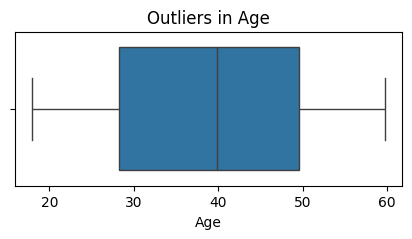

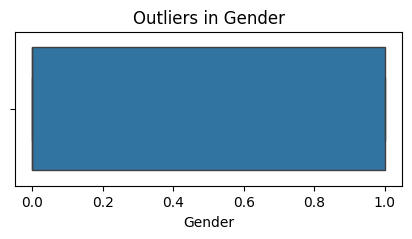

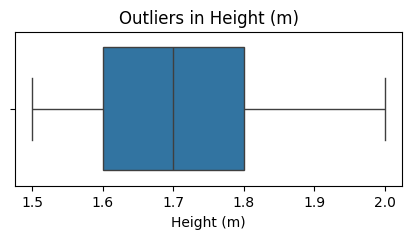

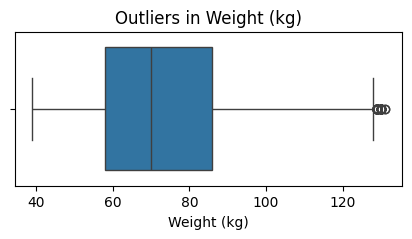

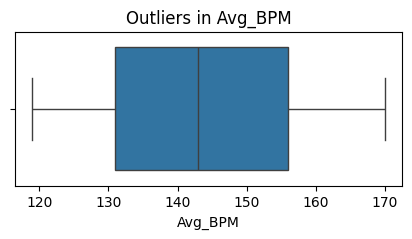

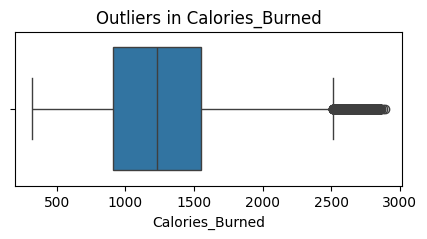

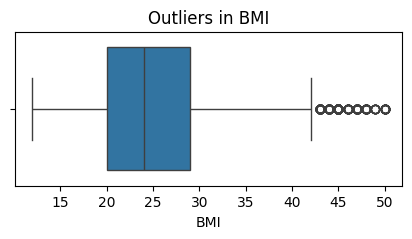

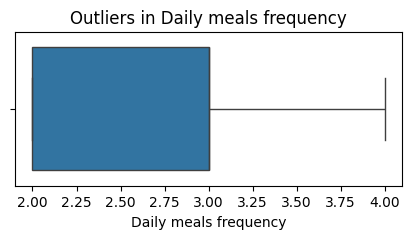

Age                      float64
Gender                     int64
Height (m)               float64
Weight (kg)              float64
Avg_BPM                  float64
Calories_Burned          float64
BMI                      float64
Daily meals frequency    float64
Workout_Type              object
Burns_Calories_Bin        object
dtype: object
                Age        Gender    Height (m)   Weight (kg)       Avg_BPM  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      38.851510      0.498600      1.724700     73.901500    143.705600   
std       12.115132      0.500011      0.133251     21.177937     14.266443   
min       18.000000      0.000000      1.500000     39.000000    119.000000   
25%       28.200000      0.000000      1.600000     58.000000    131.000000   
50%       39.900000      0.000000      1.700000     70.000000    143.000000   
75%       49.600000      1.000000      1.800000     86.000000    156.000000   
max       59.700000     

In [ ]:
cols = ['Age', 'Gender', 'Height (m)', 'Weight (kg)', 'Avg_BPM',
        'Calories_Burned', 'BMI', 'Daily meals frequency',
        'Workout_Type', 'Burns_Calories_Bin']
for col in cols:
    if pd.api.types.is_numeric_dtype(df[col]):      # EDA- am lucrat in continuare pe cele 10 coloane, am gasit tipuri de date,
        plt.figure(figsize=(5,2))                         # statistici, am detectat anomaliile,
        sns.boxplot(x=df[col])
        plt.title(f"Outliers in {col}")
        plt.show()
print(df[cols].dtypes)
print(df[cols].describe())

In [ ]:
df = df[cols].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    20000 non-null  float64
 1   Gender                 20000 non-null  int64  
 2   Height (m)             20000 non-null  float64
 3   Weight (kg)            20000 non-null  float64
 4   Avg_BPM                20000 non-null  float64
 5   Calories_Burned        20000 non-null  float64
 6   BMI                    20000 non-null  float64
 7   Daily meals frequency  20000 non-null  float64
 8   Workout_Type           20000 non-null  object 
 9   Burns_Calories_Bin     20000 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 1.5+ MB


In [ ]:
target = 'Burns_Calories_Bin'
df[target].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very high': 3})

,Burns_Calories_Bin
0,1.0
1,2.0
2,2.0
3,2.0
4,0.0
...,...
19995,1.0
19996,0.0
19997,2.0
19998,0.0


In [37]:
cols = ['Age', 'Gender', 'Height (m)', 'Weight (kg)', 'Avg_BPM',
        'Calories_Burned', 'BMI', 'Daily meals frequency',
        'Workout_Type', 'Burns_Calories_Bin']
df = df[cols].copy()

target = 'Burns_Calories_Bin'
# df[target] = df[target].astype(str).str.strip().str.lower()
y = df[target].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})

X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = LogisticRegression(max_iter=2000, class_weight='balanced')
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 0.34425


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
threshold = y.median()
y_bin = (y >= threshold).astype(int)
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

# alegem antrenarea modelulul
# vrem clasificare (ex.: „subponderal/normal/supraponderal/obez”)
# transformam Weight (kg) în categorii, apoi folosim LogisticRegression.


Accuracy: 0.58425


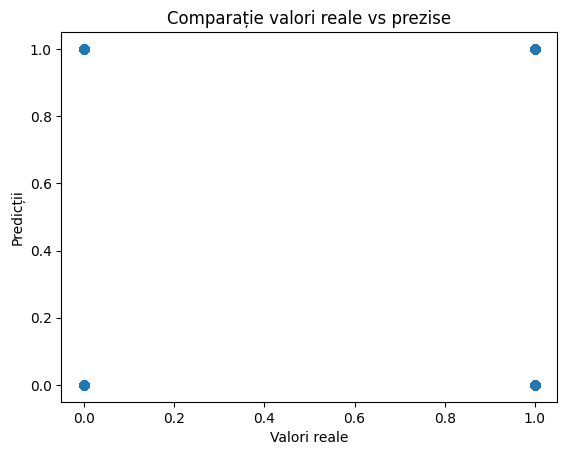

In [48]:
plt.scatter(y_test, y_pred)

plt.xlabel("Valori reale")
plt.ylabel("Predicții")
plt.title("Comparație valori reale vs prezise")
plt.show()


In [50]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_pred = clf.predict(X_test_scaled)


# For regression:
# print("MSE:", mean_squared_error(y_test, y_pred))
# print("R2 Score:", r2_score(y_test, y_pred))

# For classification:
y_pred_clas = np.round(y_pred)
print("Acuratețe:", accuracy_score(y_test, y_pred_clas))
print(confusion_matrix(y_test, y_pred_clas))
print(classification_report(y_test, y_pred_clas))

Acuratețe: 0.48925
[[1399  601]
 [1442  558]]
              precision    recall  f1-score   support

           0       0.49      0.70      0.58      2000
           1       0.48      0.28      0.35      2000

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.47      4000
weighted avg       0.49      0.49      0.47      4000



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
